# Customize Your Work 
### Build Your Own Classifier that  
Use this Method `keras.preprocessing.image.ImageDataGenerator` it may help you 
> Get the 2 class names from instructor and Rush Starting !

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        horizontal_flip=True,
        fill_mode='nearest')

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        'train',  # this is the target directory
        target_size=(32,32),  
        batch_size=16,
        class_mode='binary')

Found 1240 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
        'test',  # this is the target directory
        target_size=(32, 32),  
        batch_size=16,
        class_mode='binary')

Found 434 images belonging to 2 classes.


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=70, 
                    validation_data=(test_generator))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 78 steps, validate for 28 steps
Epoch 1/70
78/78 [==============================] - 16s 199ms/step - loss: 0.5308 - accuracy: 0.7653 - val_loss: 0.7847 - val_accuracy: 0.5300
Epoch 2/70
78/78 [==============================] - 12s 157ms/step - loss: 0.4670 - accuracy: 0.8427 - val_loss: 0.7932 - val_accuracy: 0.5300
Epoch 3/70
78/78 [==============================] - 11s 144ms/step - loss: 0.4531 - accuracy: 0.8548 - val_loss: 0.5889 - val_accuracy: 0.7028
Epoch 4/70
78/78 [==============================] - 11s 141ms/step - loss: 0.4508 - accuracy: 0.8548 - val_loss: 0.7564 - val_accuracy: 0.5461
Epoch 5/70
78/78 [==============================] - 13s 170ms/step - loss: 0.4529 - accuracy: 0.8540 - val_loss: 0.5021 - val_accuracy: 0.7903
Epoch 6/70
78/78 [==============================] - 13s 172ms/step - loss: 0.4289 - accuracy: 0.8806 - val_loss: 0.6322 - val_accuracy: 0.6682
Epoch 7/70
78/78 [==============================] 

  ...
    to  
  ['...']
28/28 - 2s - loss: 0.4195 - accuracy: 0.8894


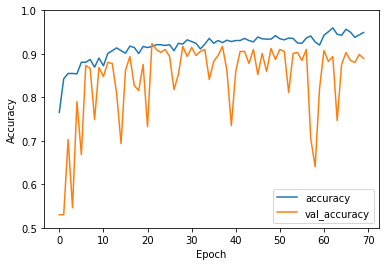

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)